# Concept drift detection example using fashion MNIST dataset

Using (fashion mnist)[https://github.com/zalandoresearch/fashion-mnist] dataset to explore concept drift detection algorithms in an image classification domain. The dataset contains 70 000 examples with 60 000 training examples and 10 000 test examples. Each example is a 28x28 greyscale image, and is associated with one of 10 classes: t-shit/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot. 

In order to simulate a 'simple' concept drift example, the dataset is modified such that the model classifies according to larger categories, shoes and clothing, where the original classes are subsets of the labels. The model is trained on a concept where shoes consists of Sandal and Sneaker. It is then tested and introduced to ankle boot as a new concept resulting in a concept drift. 

In [1]:
# import libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras_tuner
from frouros.detectors.concept_drift import DDM, DDMConfig
from frouros.metrics import PrequentialError

C:\Users\sukr0009\AppData\Local\Temp\ipykernel_15888\456794166.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from process_data import Data


data = Data()

print(data.train_images_original.shape)

(60000, 28, 28)


(60000,)


(-0.5, 27.5, 27.5, -0.5)

<Figure size 640x480 with 0 Axes>

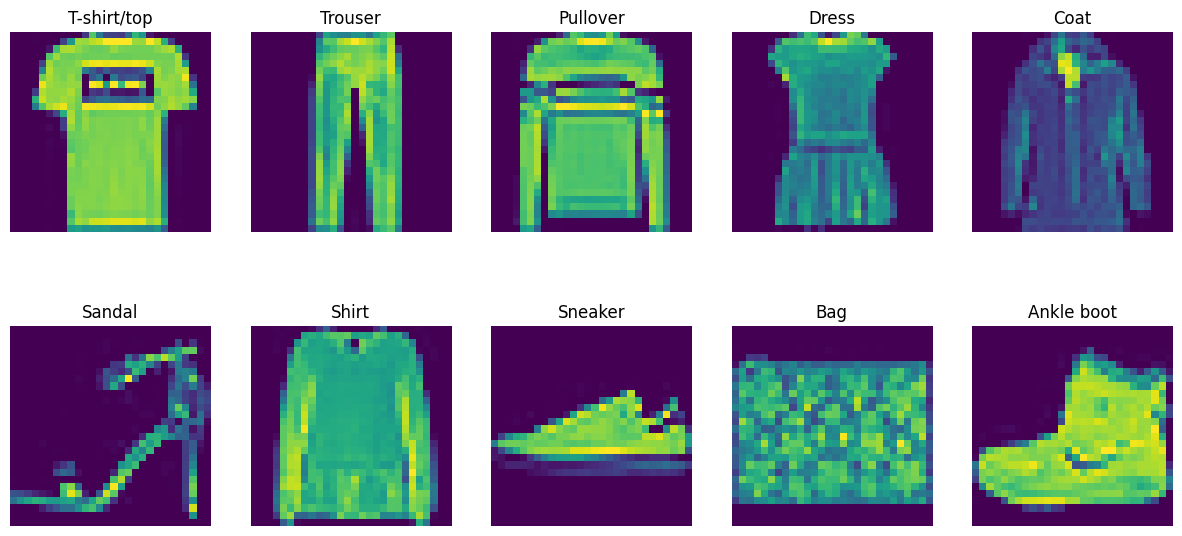

In [3]:
# show unaltered data 
import matplotlib.pyplot as plt
import numpy as np
plt.figure()

rows = 2
cols = 5
print(data.train_labels_original.shape)
fig = plt.figure(figsize=(15, 7))

for i in range(10):
    fig.add_subplot(rows, cols, i+1) 
  
    label = np.where(data.train_labels_original == i)[0][0]

    plt.imshow(data.train_images_original[label])
    plt.title(data.original_labels_name[i])  # Set subplot title
    plt.axis('off')

plt.axis('off')

In [4]:
data.remove_class_from_training_data(5)
print(data.train_x.shape)
print(data.removed_class_images.shape)

(54000, 28, 28)
(7000, 28, 28)


<Figure size 640x480 with 0 Axes>

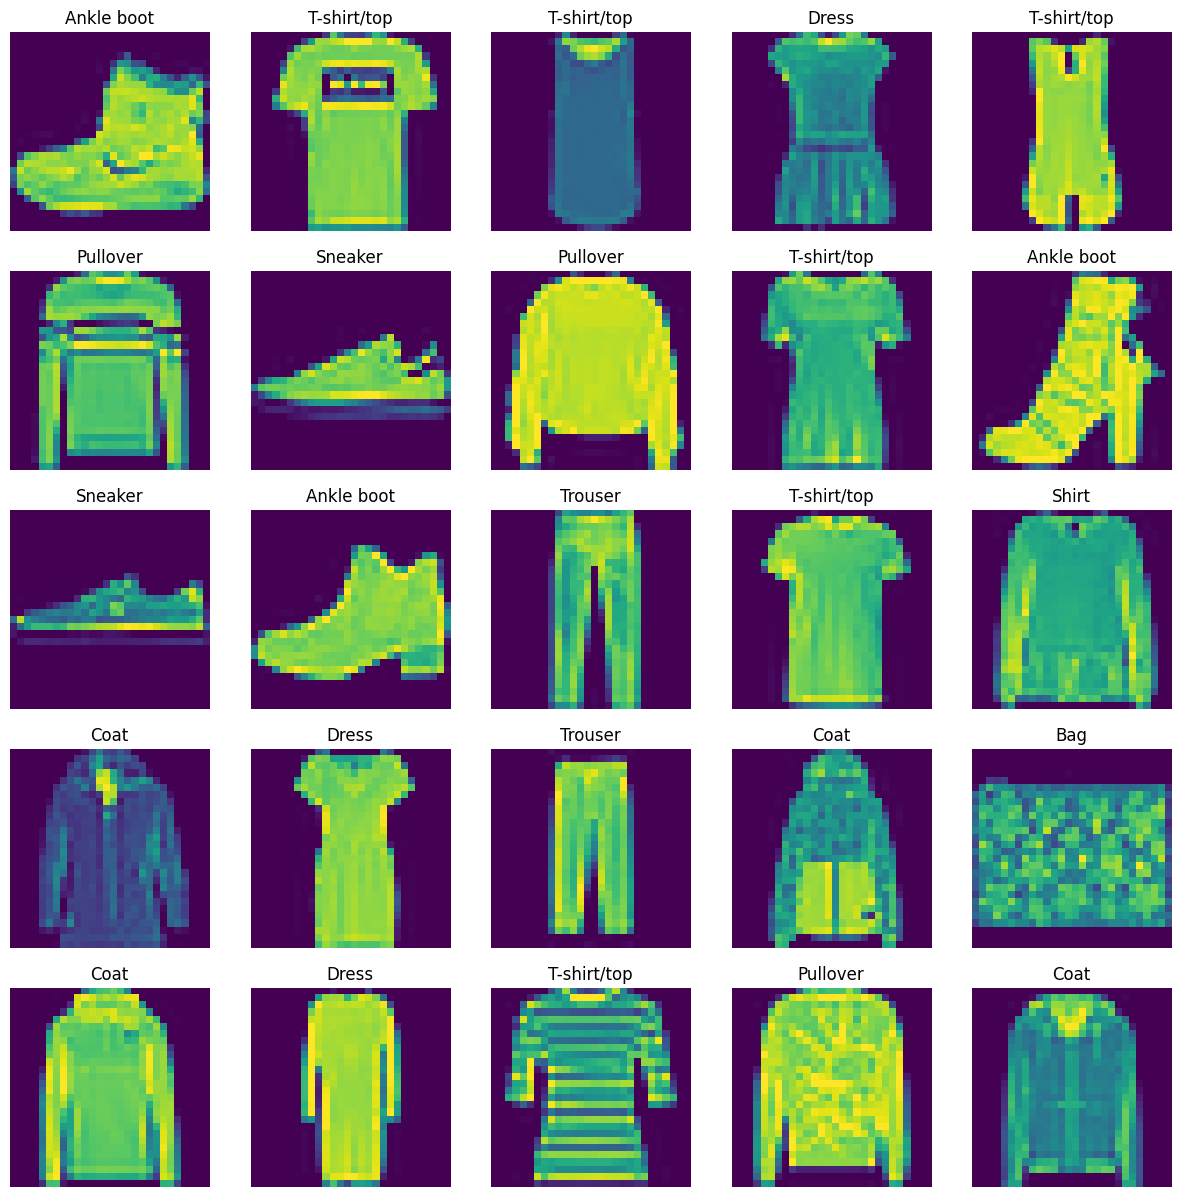

<Figure size 640x480 with 0 Axes>

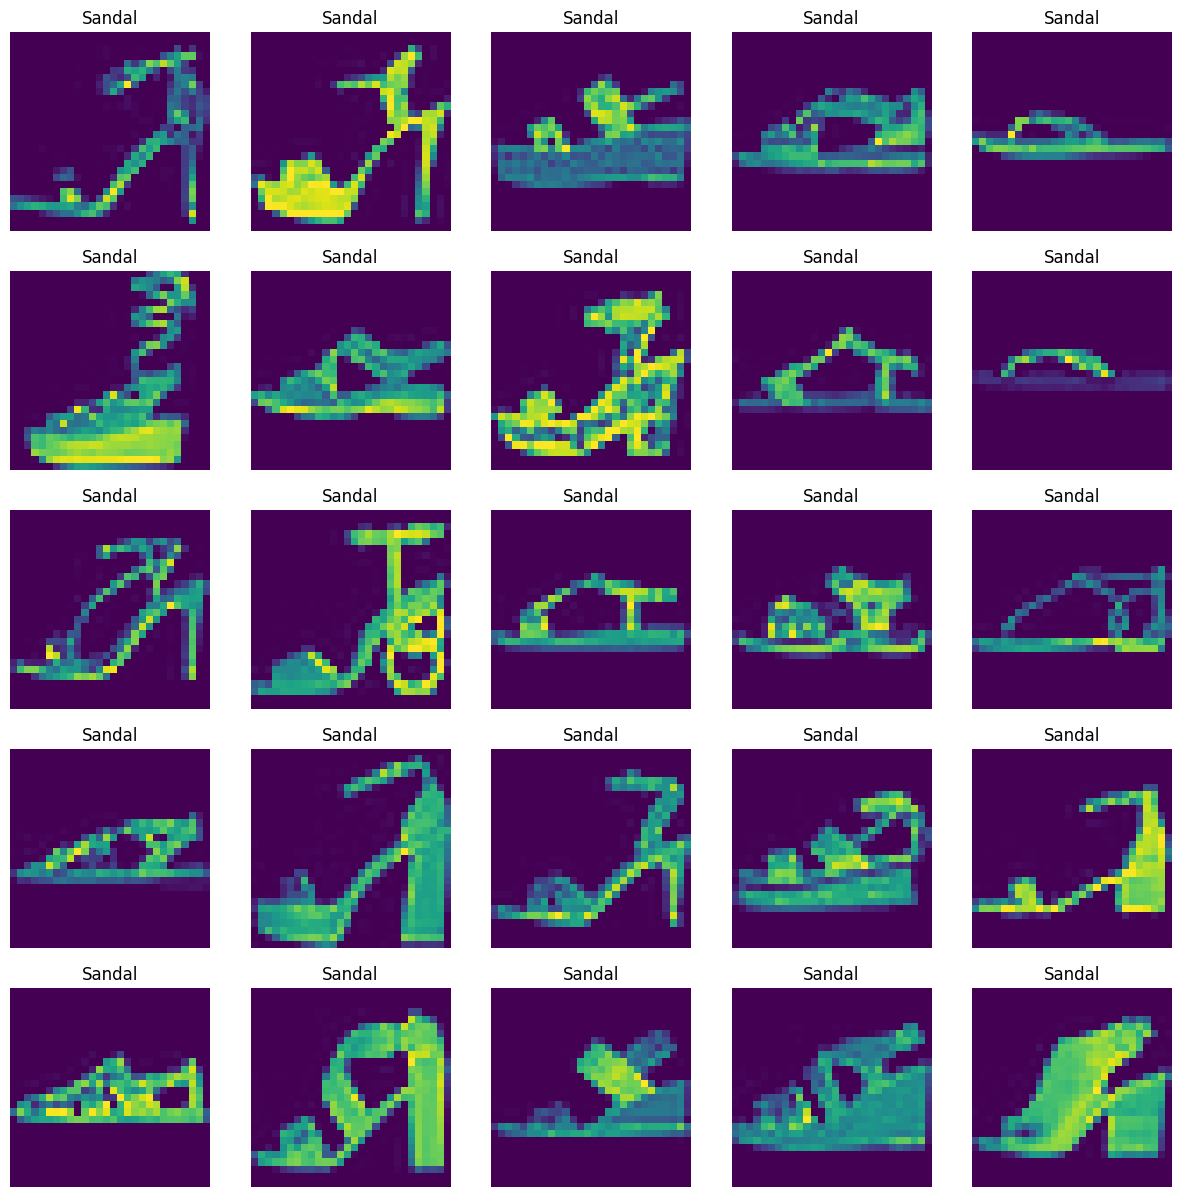

In [5]:
# show unaltered data 
import matplotlib.pyplot as plt
import numpy as np

rows = 5
cols = 5

#print train data with removed class
plt.figure()

fig = plt.figure(figsize=(15, 15))

for i in range(25):
    fig.add_subplot(rows, cols, i+1) 
    label = data.train_y[i]
    plt.imshow(data.train_x[i])
    plt.title(data.original_labels_name[label])  # Set subplot title
    plt.axis('off')

# print removed class

plt.figure()

fig = plt.figure(figsize=(15, 15))

for i in range(25):
    fig.add_subplot(rows, cols, i+1) 
    label = data.removed_class_labels[i]
    plt.imshow(data.removed_class_images[i])
    plt.title(data.original_labels_name[label])  # Set subplot title
    plt.axis('off')

In [6]:
data.simulation_split(0.5)

In [7]:
%reload_ext autoreload
%autoreload 2
%aimport process_data
data.preprocess_class_names()

In [8]:
print( data.test_y_split.shape[0])

27000


In [9]:
import random 

print("Shape of test data:", data.test_y_split.shape)
print("Shape of test data:", data.test_y_super.shape)
# k = number of items to select
sample_list = random.choices(range(0,data.test_y_split.shape[0]), k=10)
print(sample_list)

for i in sample_list:
    print(f"Original label {data.original_labels_name[data.test_y_split[i]]}, becomes {data.new_class_names[data.test_y_super[i]]}")

Shape of test data: (27000,)
Shape of test data: (27000,)
[3975, 16368, 7602, 16648, 9017, 13464, 23620, 3771, 11645, 16747]
Original label Dress, becomes Clothes
Original label Coat, becomes Clothes
Original label T-shirt/top, becomes Clothes
Original label Trouser, becomes Clothes
Original label T-shirt/top, becomes Clothes
Original label Bag, becomes Accessories
Original label Ankle boot, becomes Shoes
Original label Coat, becomes Clothes
Original label Shirt, becomes Clothes
Original label Trouser, becomes Clothes


<Figure size 640x480 with 0 Axes>

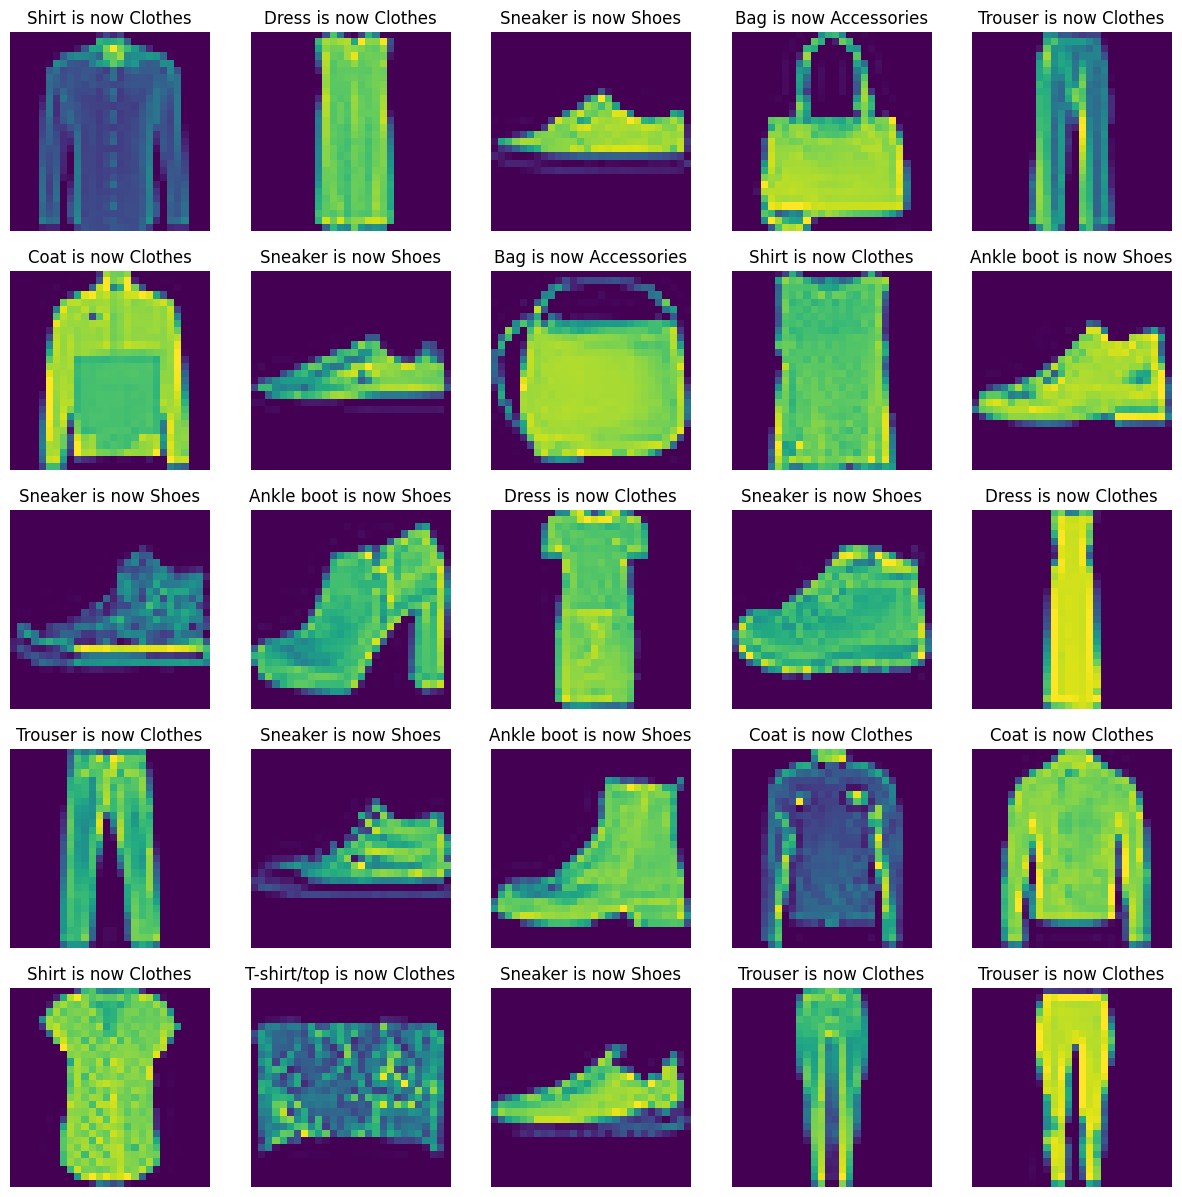

<Figure size 640x480 with 0 Axes>

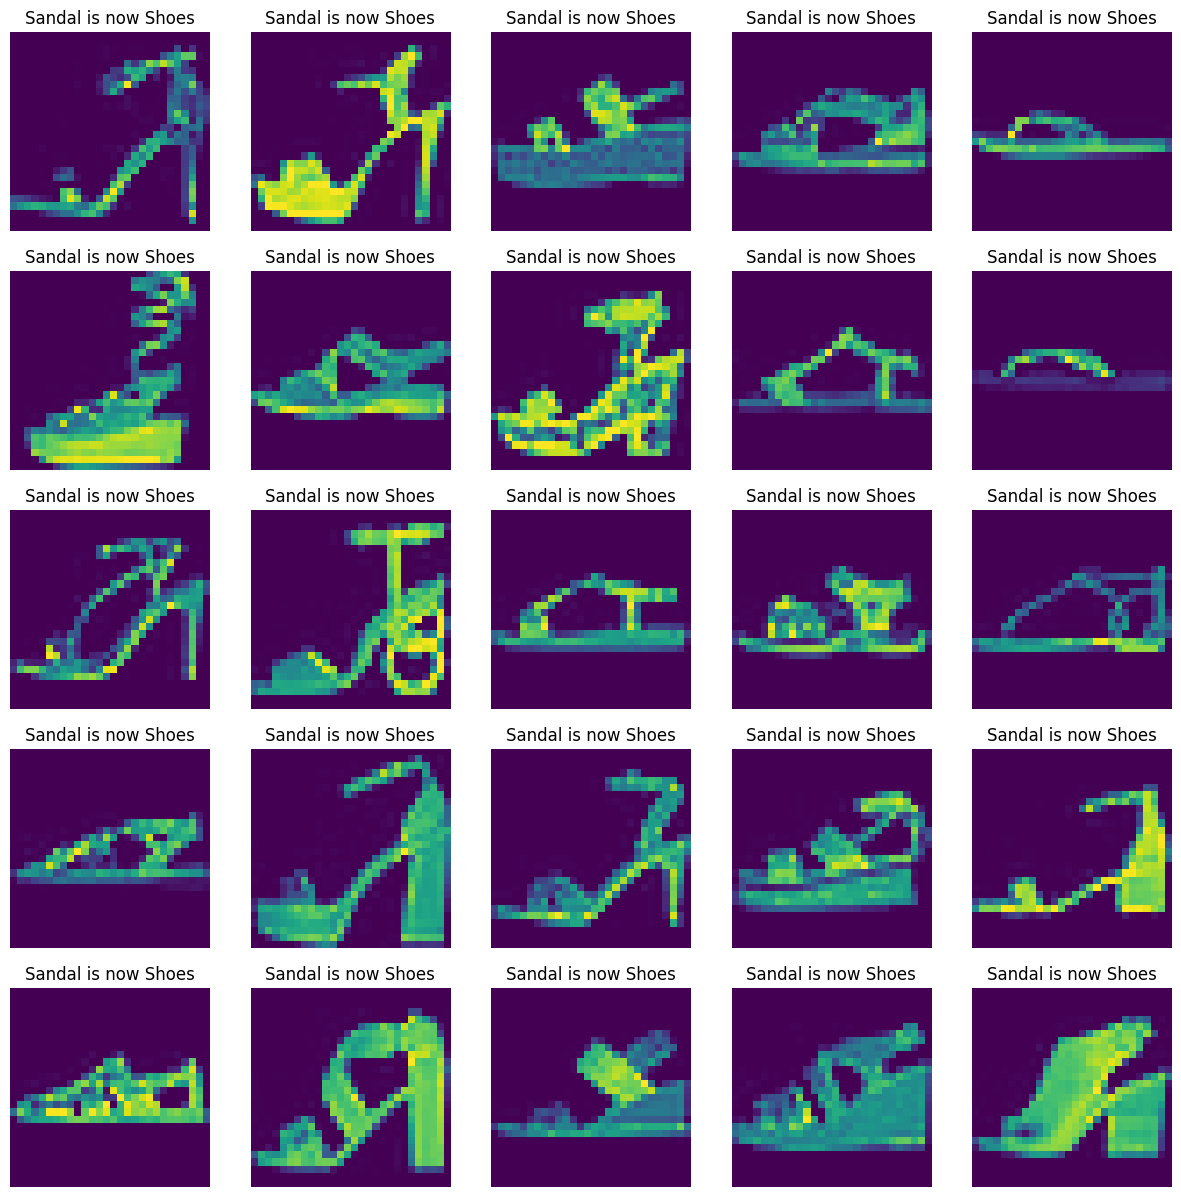

In [10]:
# show unaltered data 
import matplotlib.pyplot as plt
import numpy as np

rows = 5
cols = 5

#print train data with removed class
plt.figure()

fig = plt.figure(figsize=(15, 15))
# k = number of items to select
sample_list = random.choices(range(0,data.train_y_split.shape[0]), k=25)
image_count = 1
for i in sample_list:
    fig.add_subplot(rows, cols, image_count) 
    new_label = data.train_y_super[i]
    old_label = data.train_y_split[i]
    plt.imshow(data.train_x_split[i])
    plt.title(f"{data.original_labels_name[old_label]} is now {data.new_class_names[new_label]}")  # Set subplot title
    plt.axis('off')
    image_count += 1

# print removed class

plt.figure()

fig = plt.figure(figsize=(15, 15))
# k = number of items to select
sample_list = random.choices(range(0,data.removed_class_labels_super.shape[0]), k=25)
image_count = 1
for i in range(25):
    fig.add_subplot(rows, cols, i+1) 
    new_label = data.removed_class_labels_super[i]
    old_label = data.removed_class_labels[i]
    plt.imshow(data.removed_class_images[i])
    plt.title(f"{data.original_labels_name[old_label]} is now {data.new_class_names[new_label]}")  # Set subplot title
    plt.axis('off')

In [11]:
data.preprocess()

<Figure size 640x480 with 0 Axes>

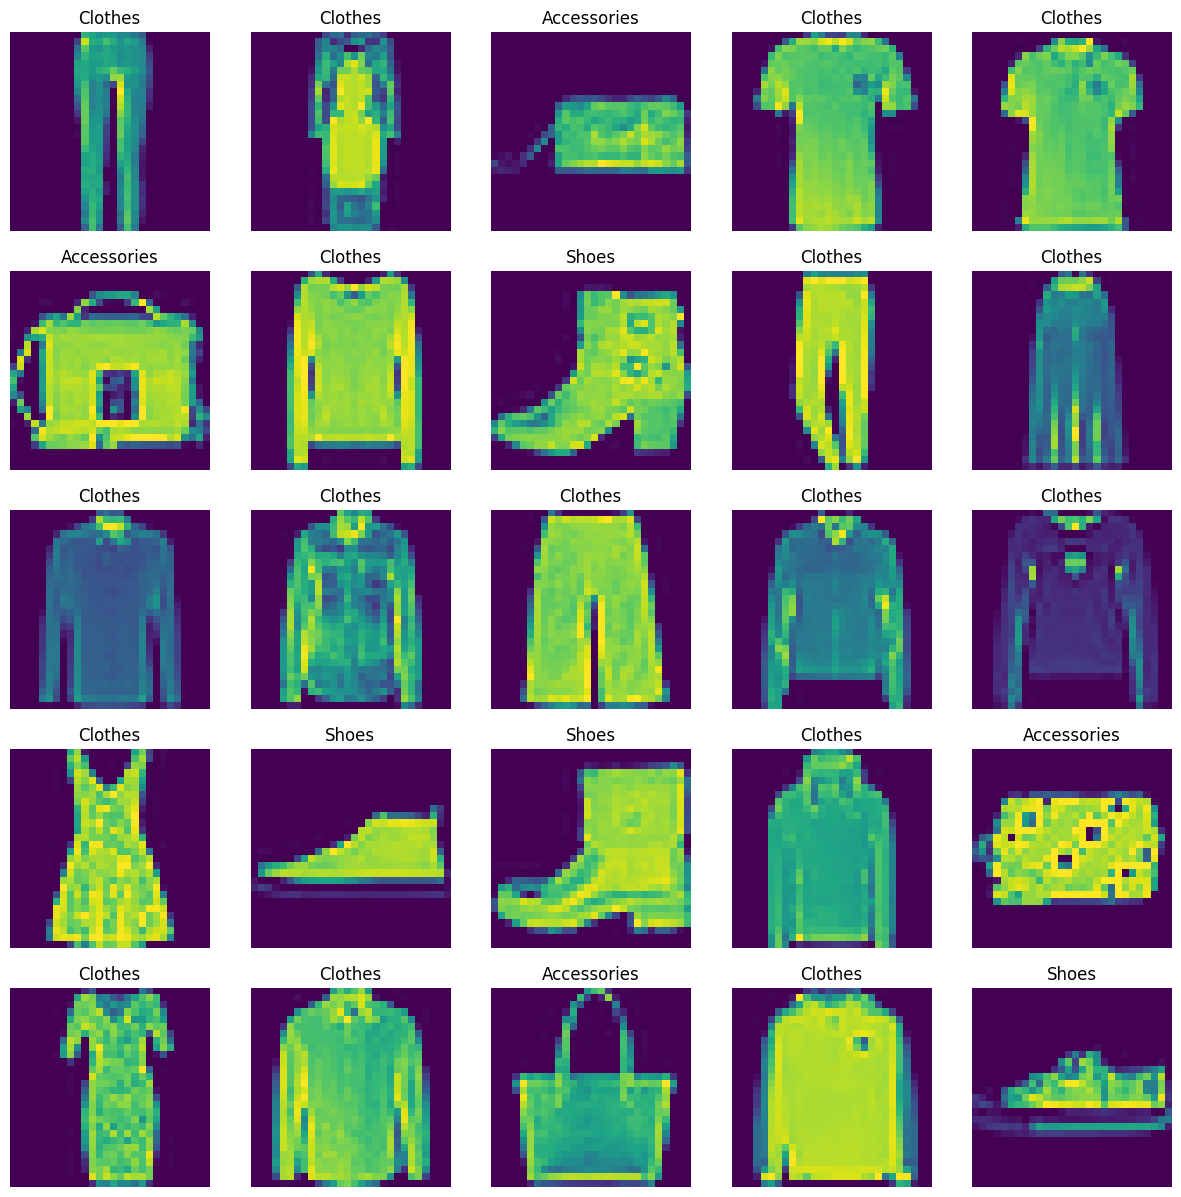

In [12]:
# show unaltered data 
import matplotlib.pyplot as plt
import numpy as np

rows = 5
cols = 5

#print train data with removed class
plt.figure()

fig = plt.figure(figsize=(15, 15))

for i in range(25):
    fig.add_subplot(rows, cols, i+1) 
    label = np.argmax(data.train_y_super[i])
    plt.imshow(data.train_x_split[i])
    plt.title(data.new_class_names[label])  # Set subplot title
    plt.axis('off')

# print removed class



In [13]:
print('Train: X=%s, y=%s' % (data.train_x_split.shape, data.train_y_super.shape))
print('Validation: X=%s, y=%s' % (data.val_x.shape,  data.val_y_super.shape))
print('Test: X=%s, y=%s' % (data.test_x_split.shape,  data.test_y_super.shape))
print('Removed: X=%s, y=%s' % (data.removed_class_images.shape,  data.removed_class_labels_super.shape))

Train: X=(27000, 28, 28, 1), y=(27000, 3)
Validation: X=(9000, 28, 28, 1), y=(9000, 3)
Test: X=(27000, 28, 28, 1), y=(27000, 3)
Removed: X=(7000, 28, 28, 1), y=(7000, 3)


In [14]:
print(data.train_x_split[0].shape)
print(data.train_x_split[:2000].shape, data.train_y_split[:2000].shape, data.val_x[:200].shape, data.val_y_super[:200].shape)

(28, 28, 1)
(2000, 28, 28, 1) (2000,) (200, 28, 28, 1) (200, 3)


In [15]:
%reload_ext autoreload
%autoreload 2
%aimport process_data
data.concat_test_data()
print(f"Streaming data: X={data.stream_x.shape}, Y_new={data.stream_y.shape}, Y_old={data.stream_y_original.shape}")

2001 1
13494
21505 5
33999
Streaming data: X=(34000, 28, 28, 1), Y_new=(34000, 3), Y_old=(34000,)


<Figure size 640x480 with 0 Axes>

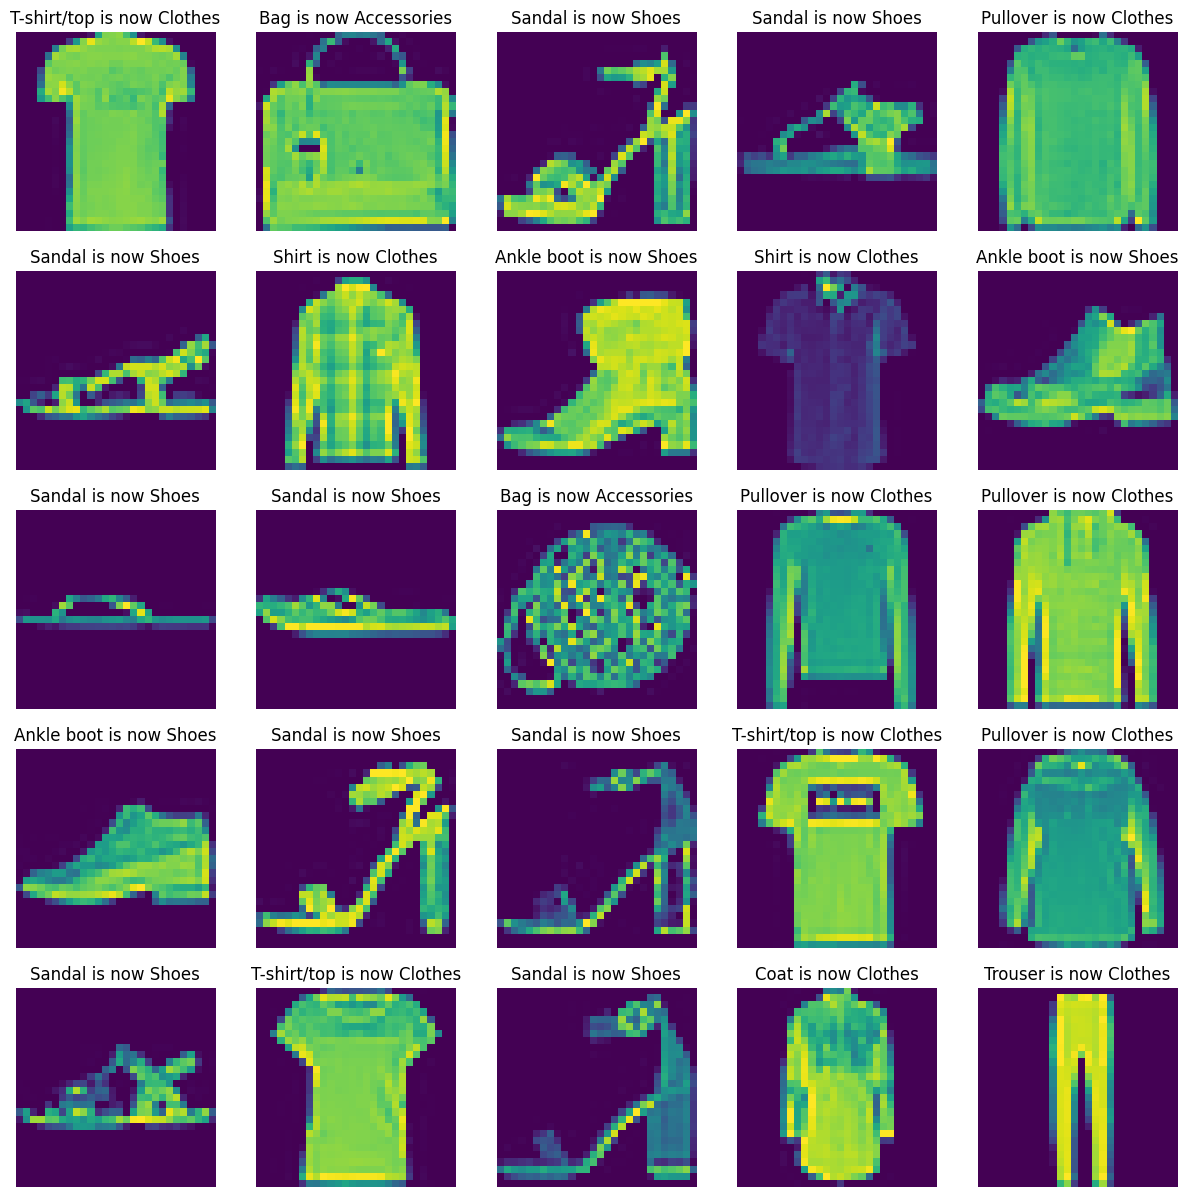

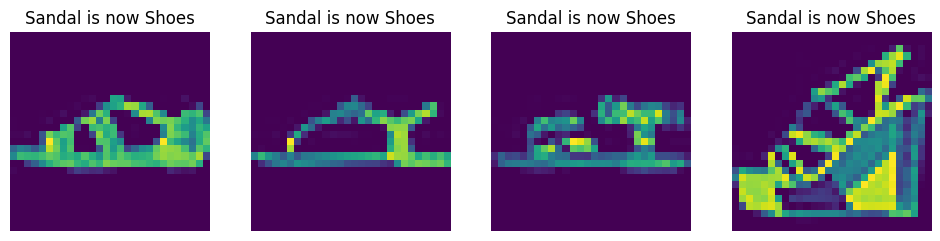

In [16]:
rows = 5
cols = 5

#print train data with removed class
plt.figure()

fig = plt.figure(figsize=(15, 15))
# k = number of items to select
sample_list = random.choices(range(0,data.stream_y_original.shape[0]), k=25)
image_count = 1
for i in sample_list:
    fig.add_subplot(rows, cols, image_count) 
    new_label = np.argmax(data.stream_y[i])
    old_label = data.stream_y_original[i]
    plt.imshow(data.stream_x[i])
    plt.title(f"{data.original_labels_name[old_label]} is now {data.new_class_names[new_label]}")  # Set subplot title
    plt.axis('off')
    image_count += 1

# print removed class
fig = plt.figure(figsize=(15, 15))
# k = number of items to select
drifts = [data.drift1, data.drift2, data.drift3, data.drift4]
image_count = 1
for i in drifts:
    fig.add_subplot(rows, cols, image_count) 
    new_label = np.argmax(data.stream_y[i])
    old_label = data.stream_y_original[i]
    plt.imshow(data.stream_x[i])
    plt.title(f"{data.original_labels_name[old_label]} is now {data.new_class_names[new_label]}")  # Set subplot title
    plt.axis('off')
    image_count += 1

# print removed class


In [17]:

print(f"Drift indices:{data.drift1}, {data.drift2}, {data.drift3}, {data.drift4}")
driftpoints = [data.drift1, data.drift2, data.drift3, data.drift4]

Drift indices:2001, 13494, 21505, 33999


In [18]:
from tensorflow.keras import metrics

def build_model(hp):

    # Define CNN architecture
    model = Sequential()
    
    num_layers = 9
    num_epochs = 10
    num_batch = 64
    # Convolutional layers
    model.add(Conv2D(filters=hp.Int('units_0', min_value=32, max_value = 512, step=128), kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('units_1', min_value=32, max_value = 512, step=128), kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('units_2', min_value=32, max_value = 64, step=16), kernel_size=(3, 3), activation='relu'))
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(units=hp.Int('dense', min_value=32, max_value = 64, step=16), activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Output layer with 10 classes for Fashion MNIST
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',metrics.Precision(),metrics.Recall(),metrics.CategoricalAccuracy()])
    
    return model



In [19]:

build_model(keras_tuner.HyperParameters())
tuner = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials=5,executions_per_trial=2, overwrite=True)


In [20]:

tuner.search_space_summary()



Search space summary
Default search space size: 4
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
dense (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}


In [21]:
subset_train_x = data.train_x_split[:2000]
subset_train_y =  data.train_y_super[:2000]
subset_val_x = data.val_x[:200]
subset_val_y = data.val_y_super[:200]

tuner.search(subset_train_x, subset_train_y, epochs=5, validation_data=(subset_val_x, subset_val_y))

Trial 5 Complete [00h 00m 15s]
val_accuracy: 0.9850000143051147

Best val_accuracy So Far: 0.987500011920929
Total elapsed time: 00h 05m 02s


In [22]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 160)       1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 160)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 416)       599456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 416)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 48)          179760    
                                                                 
 flatten (Flatten)           (None, 432)               0

In [23]:
# Use the whole training and validation set to train the model with the best hyperparameters found
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])
history = model.fit(data.train_x_split,data.train_y_super, epochs=5, validation_data=(data.val_x,data.val_y_super))

Epoch 1/5
844/844 [==============================] - 106s 125ms/step - loss: 0.0565 - accuracy: 0.9842 - precision_1: 0.9856 - recall_1: 0.9822 - categorical_accuracy: 0.9842 - val_loss: 0.0401 - val_accuracy: 0.9889 - val_precision_1: 0.9893 - val_recall_1: 0.9886 - val_categorical_accuracy: 0.9889
Epoch 2/5
844/844 [==============================] - 106s 126ms/step - loss: 0.0220 - accuracy: 0.9941 - precision_1: 0.9942 - recall_1: 0.9940 - categorical_accuracy: 0.9941 - val_loss: 0.0291 - val_accuracy: 0.9919 - val_precision_1: 0.9919 - val_recall_1: 0.9919 - val_categorical_accuracy: 0.9919
Epoch 3/5
844/844 [==============================] - 107s 127ms/step - loss: 0.0169 - accuracy: 0.9950 - precision_1: 0.9951 - recall_1: 0.9950 - categorical_accuracy: 0.9950 - val_loss: 0.0364 - val_accuracy: 0.9918 - val_precision_1: 0.9918 - val_recall_1: 0.9918 - val_categorical_accuracy: 0.9918
Epoch 4/5
844/844 [==============================] - 104s 123ms/step - loss: 0.0113 - accuracy: 0

In [24]:
from scipy.stats import chi2_contingency

# Calculate observed class frequencies for dataset 1 and dataset 2
class_counts_dataset1 = np.sum(data.train_y_super, axis=0)
class_counts_dataset2 = np.sum(data.stream_y, axis=0)

print(f"Class distributions of training data where a class example has been removed {class_counts_dataset1}")
print(f"Class distributions of test data where the class example has been reintroduced  {class_counts_dataset2}")

Class distributions of training data where a class example has been removed [18076.  5967.  2957.]
Class distributions of test data where the class example has been reintroduced  [17924. 13033.  3043.]


In [25]:
# ensure significant difference in class distributions before and after reintruction of removed data 
# Perform Chi-squared test
chi2_stat, p_val, _, _ = chi2_contingency([class_counts_dataset1, class_counts_dataset2])

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print(f"There is a significant difference in class distributions between the datasets (reject null hypothesis) with p-value {p_val}")
else:
    print("There is no significant difference in class distributions between the datasets (fail to reject null hypothesis)")

There is a significant difference in class distributions between the datasets (reject null hypothesis) with p-value 0.0


In [26]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px


data_x = data.train_x_split
n_samples = len(data_x)
data_sample = data_x.reshape((n_samples, -1))
target = data.train_y_super

# target is one-hot encoded, convert it to class labels
class_labels = np.argmax(target, axis=1)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_sample)

# Print out shapes and contents for debugging
print("Shapes:")
print("data_sample:", data_sample.shape)
print("class_labels:", class_labels.shape)
print("data_pca:", data_pca.shape)

df_pca = pd.DataFrame({'target': map(lambda x : str(x),class_labels), 'x': data_pca[:, 0], 'y': data_pca[:, 1]})


Shapes:
data_sample: (27000, 784)
class_labels: (27000,)
data_pca: (27000, 2)


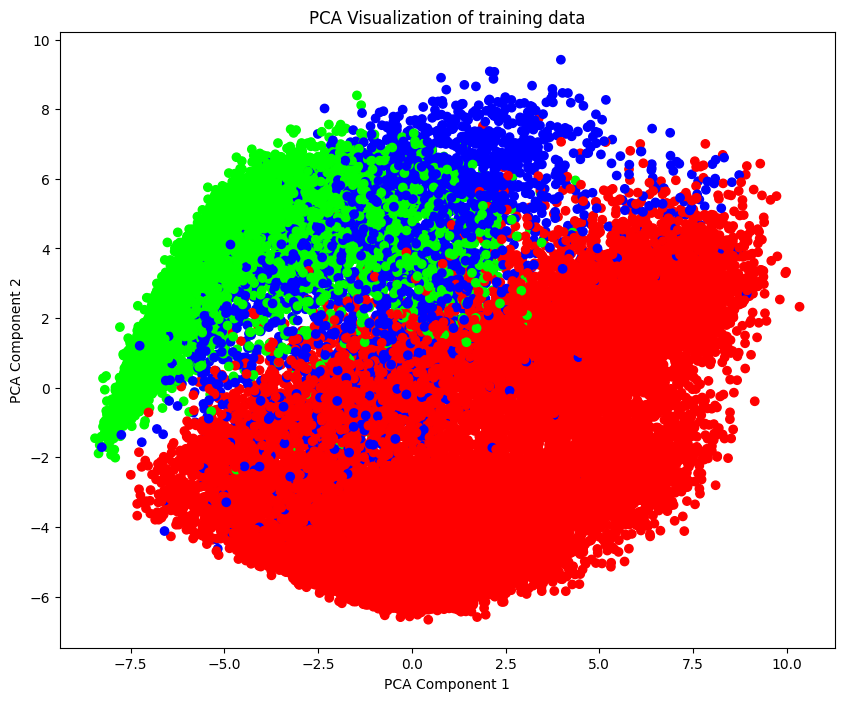

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['x'], df_pca['y'], c=target)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of training data')
plt.savefig('PCA_training.png')
plt.show()

In [28]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px


data_x = data.stream_x
n_samples = len(data_x)
data_sample = data.stream_x.reshape((n_samples, -1))
target = data.stream_y

# target is one-hot encoded, convert it to class labels
class_labels = np.argmax(target, axis=1)

pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_sample)
df_pca_2 = pd.DataFrame({'target': map(lambda x : str(x),class_labels), 'x': data_pca_2[:, 0], 'y': data_pca_2[:, 1]})

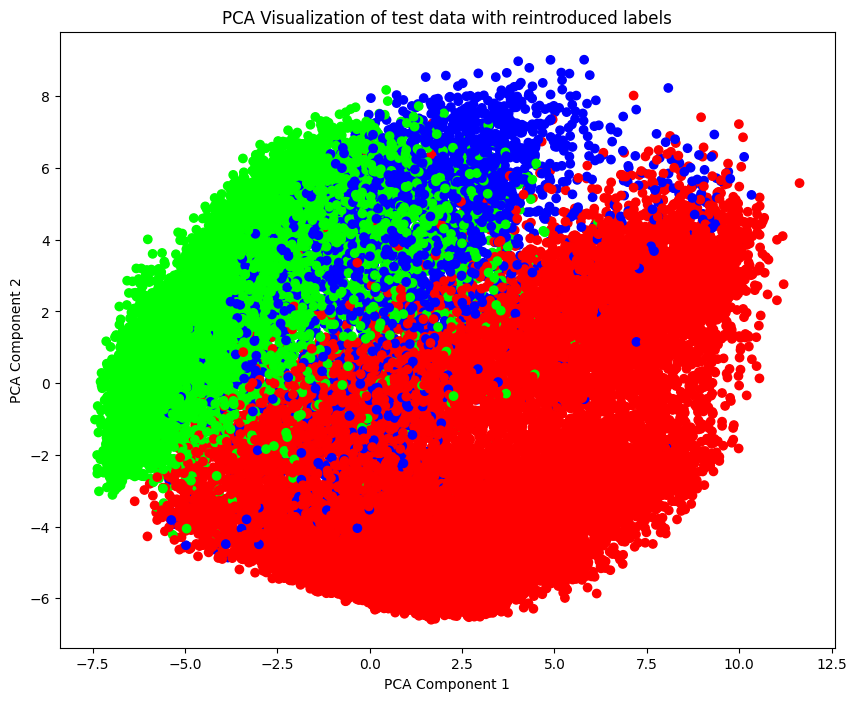

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2['x'], df_pca_2['y'], c=target)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of test data with reintroduced labels')
plt.savefig('PCA_test.png')
plt.show()

In [30]:

y_predicted = []
error_list = []
confidences = []
# predict each instance in the test datastream. Store the predicted classes, errors, confidence levels
# predict seperatly from drift detectors so we can evealuate time and computation costs for each drift detector 
for i, (X, y) in enumerate(zip(data.stream_x, data.stream_y)):
    y_pred = model.predict(X.reshape(1, 28, 28, 1), verbose=0)
    confidence = np.max(y_pred)
    confidences.append(confidence)
    y_pred_class = np.argmax(y_pred)
    y_predicted.append(y_pred_class)
    y_class = np.argmax(y)
    err = 1 - (y_pred_class.item() == y_class.item())
    error_list.append(err)

In [31]:
import time 
import psutil 
from river import drift

time_start = time.time()


adwin = drift.ADWIN()

# test using error rates 
 # Update drift detector and verify if change is detected
for i, error in enumerate(error_list):
    adwin.update(error)
    if adwin.drift_detected:
        print(f"Adwin: Change detected at index {i}")


time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)

Adwin: Change detected at index 4607
Adwin: Change detected at index 15871
Adwin: Change detected at index 23327
Execution time: 0.09191250801086426 seconds
RAM usage: 22198595584 bytes
RAM hours: 0.000527834466566522


In [96]:
from statistics import mean 

def evaluate_drift(detected_drifts, drift_times): 

    # True drift detection are the smallest detections between the drift intervalls 
    # if no drift is detected between two drift intervals then we assume a false negative reading, as a drift signal should be triggered
    nearest_drifts = []
    false_negatives = 0
    for i in range(len(drift_times)-1):
        nearest = min((drift for drift in detected_drifts if drift_times[i+1]> drift > drift_times[i]), default=None)
        if nearest is not None:
            nearest_drifts.append(nearest)
        if nearest is None: 
            false_negatives += 1

    # The false negative rate is the amount of times the detector did not trigger a signal 
    #for a drift intervall divided by the times a signal should have been triggered
    false_negative_rate = false_negatives / (len(drift_times)-1)

    # false positive drift signals are all drift signals triggered after a true drift signal in an intervall, that is all
    # drift signals not in the true signal list
    detection_rate = len(nearest_drifts)/(len(drift_times)-1)
    false_positives_mask = [x not in nearest_drifts for x in detected_drifts]
    false_positives = [x for x, m in zip(detected_drifts, false_positives_mask) if m]
    false_positives_rate = len(false_positives) / len(detected_drifts)

    # evaluate the delay rate for a detector, meaning the mean of all delayed signals 
    delays = []
    for i in range(len(nearest_drifts)): 
        delays.append(nearest_drifts[i]-drift_times[i])

    false_negatives = []
    
    return nearest_drifts, detection_rate, false_negative_rate, false_positives, false_positives_rate, mean(delays)

In [97]:
import time 
import psutil 
from river import drift

time_start = time.time()


adwin = drift.ADWIN()
detected_drift = []
# test using confidences
 # Update drift detector and verify if change is detected
for i, conf in enumerate(confidences):
    adwin.update(conf)
    if adwin.drift_detected:
        print(f"Adwin: Change detected at index {i}")
        detected_drift.append(i)


time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)

print(evaluate_drift(detected_drift, driftpoints))

Adwin: Change detected at index 4095
Adwin: Change detected at index 15359
Adwin: Change detected at index 23263
Execution time: 0.09768986701965332 seconds
RAM usage: 16973180928 bytes
RAM hours: 0.00042895367052324217
[4095, 15359, 23263]
([4095, 15359, 23263], 1.0, 0.0, [], 0.0, 1905)


In [94]:
import time 
import psutil 
from river import drift

time_start = time.time()


adwin = drift.ADWIN()
detected_drift = []
# test using predictions
 # Update drift detector and verify if change is detected
for i, pred in enumerate(y_predicted):
    adwin.update(pred)
    if adwin.drift_detected:
        print(f"Adwin: Change detected at index {i}")
        detected_drift.append(i)

time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)

print(evaluate_drift(detected_drift, driftpoints))

Adwin: Change detected at index 2527
Adwin: Change detected at index 14943
Adwin: Change detected at index 22527
Execution time: 0.09417724609375 seconds
RAM usage: 16989442048 bytes
RAM hours: 0.00041392602459786255
[2527, 14943, 22527]
([2527, 14943, 22527], 1.0, [], 0.0, 999)


In [98]:
import time 
import psutil 
from river import drift

time_start = time.time()


kswin = drift.KSWIN(alpha=0.0001, seed=42)
detected_drift = []
# test using confidence levels
 # Update drift detector and verify if change is detected
for i, conf in enumerate(confidences):
    kswin.update(conf)
    if kswin.drift_detected:
        print(f"KSWIN: Change detected at index {i}")
        detected_drift.append(i)

time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)


KSWIN: Change detected at index 9124
Execution time: 9.110108613967896 seconds
RAM usage: 16960278528 bytes
RAM hours: 0.03997184220112331
[9124]
([9124], 0.3333333333333333, 0.6666666666666666, [], 0.0, 7123)


In [101]:
import time 
import psutil 
from river import drift

time_start = time.time()

detected_drift = []
kswin = drift.KSWIN(alpha=0.0001, seed=42)

# test using error rates 
 # Update drift detector and verify if change is detected
for i, error in enumerate(error_list):
    kswin.update(error)
    if kswin.drift_detected:
        print(f"KSWIN: Change detected at index {i}")
        detected_drift.append(i)


time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)

print(evaluate_drift(detected_drift, driftpoints))        

Execution time: 9.310962438583374 seconds
RAM usage: 16927789056 bytes
RAM hours: 0.04077485660832963


ZeroDivisionError: division by zero

In [99]:


time_start = time.time()


kswin = drift.KSWIN(alpha=0.009, seed=42)
detected_drift = []
# test using predictions
 # Update drift detector and verify if change is detected
for i, pred in enumerate(y_predicted):
    kswin.update(pred)
    if kswin.drift_detected:
        print(f"KSWIN: Change detected at index {i}")
        detected_drift.append(i)

time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)

print(evaluate_drift(detected_drift, driftpoints))

KSWIN: Change detected at index 1789
KSWIN: Change detected at index 4355
KSWIN: Change detected at index 8414
KSWIN: Change detected at index 10281
KSWIN: Change detected at index 13074
KSWIN: Change detected at index 15368
KSWIN: Change detected at index 15594
KSWIN: Change detected at index 21917
KSWIN: Change detected at index 23910
KSWIN: Change detected at index 24010
KSWIN: Change detected at index 27018
KSWIN: Change detected at index 32384
Execution time: 8.528801441192627 seconds
RAM usage: 16958722048 bytes
RAM hours: 0.03741784358701554
[4355, 15368, 21917]
([4355, 15368, 21917], 1.0, 0.0, [1789, 8414, 10281, 13074, 15594, 23910, 24010, 27018, 32384], 0.75, 1546)


In [37]:
import time 
import psutil 
from river import drift

time_start = time.time()


ph = drift.PageHinkley()

# test using predictions
 # Update drift detector and verify if change is detected
for i, pred in enumerate(y_predicted):
    ph.update(pred)
    if ph.drift_detected:
        print(f"PageHinkley: Change detected at index {i}")


time_end = time.time()


execution_time = time_end - time_start

print("Execution time:", execution_time, "seconds")
# Get RAM usage
ram_usage = psutil.virtual_memory().used
print("RAM usage:", ram_usage, "bytes")

# Calculate RAM hours
ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
print("RAM hours:", ram_hours)

PageHinkley: Change detected at index 2155
PageHinkley: Change detected at index 11311
PageHinkley: Change detected at index 13819
PageHinkley: Change detected at index 19096
PageHinkley: Change detected at index 21434
PageHinkley: Change detected at index 22081
PageHinkley: Change detected at index 25244
PageHinkley: Change detected at index 27278
PageHinkley: Change detected at index 29270
PageHinkley: Change detected at index 32152
Execution time: 0.06498241424560547 seconds
RAM usage: 22196404224 bytes
RAM hours: 0.00037314368568331697


In [38]:
print(data.stream_y_original.shape)
error_labels = []
errors_count = 0
for i in range(len(error_list)):
    if error_list[i] > 0:
        predicted = y_predicted[i]
        actual = np.argmax(data.stream_y[i])
        error_labels.append(data.stream_y_original[i])
        errors_count += 1

print(errors_count)

for digit in range(10):
    occurrences = error_labels.count(digit)
    print(f"Occurrences of digit {digit}: {occurrences}")

(34000,)
838
Occurrences of digit 0: 25
Occurrences of digit 1: 20
Occurrences of digit 2: 11
Occurrences of digit 3: 13
Occurrences of digit 4: 5
Occurrences of digit 5: 677
Occurrences of digit 6: 16
Occurrences of digit 7: 4
Occurrences of digit 8: 64
Occurrences of digit 9: 3
